Found 402 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Stochastic Gradient Descent


7/7 [==============================] - 0s 63ms/step - loss: 0.2431 - accuracy: 0.8922
Test Accuracy: 89.22%
7/7 [==============================] - 1s 67ms/step
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        51
           1       0.92      0.86      0.89        51

    accuracy                           0.89       102
   macro avg       0.89      0.89      0.89       102
weighted avg       0.89      0.89      0.89       102

7/7 [==============================] - 0s 62ms/step


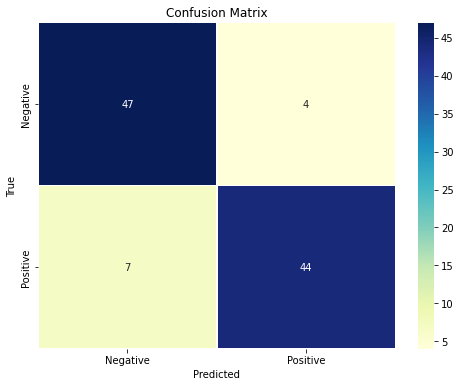

Adam


7/7 [==============================] - 1s 71ms/step - loss: 0.1201 - accuracy: 0.9804
Test Accuracy: 98.04%
7/7 [==============================] - 1s 66ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        51

    accuracy                           0.98       102
   macro avg       0.98      0.98      0.98       102
weighted avg       0.98      0.98      0.98       102

7/7 [==============================] - 1s 66ms/step


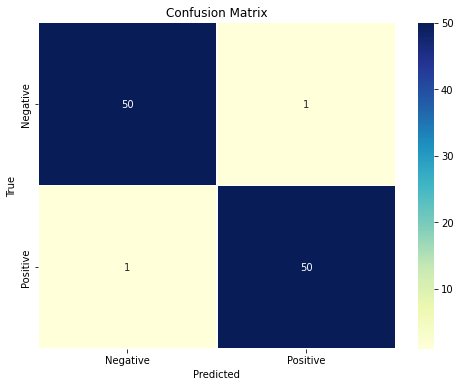

RMSprop (Root Mean Square Propagation)


7/7 [==============================] - 1s 69ms/step - loss: 0.1541 - accuracy: 0.9412
Test Accuracy: 94.12%
7/7 [==============================] - 1s 61ms/step
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        51
           1       0.98      0.90      0.94        51

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102

7/7 [==============================] - 1s 70ms/step


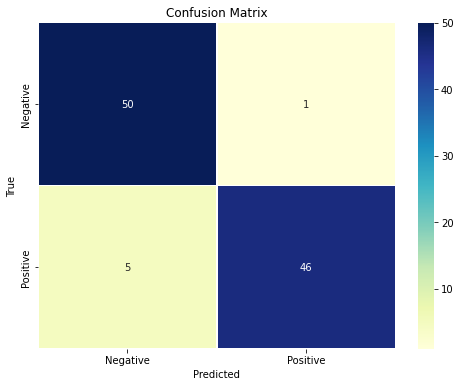

Adagrad (Adaptive Gradient Algorithm)


7/7 [==============================] - 0s 61ms/step - loss: 0.4030 - accuracy: 0.8529
Test Accuracy: 85.29%
7/7 [==============================] - 1s 62ms/step
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        51
           1       0.77      1.00      0.87        51

    accuracy                           0.85       102
   macro avg       0.89      0.85      0.85       102
weighted avg       0.89      0.85      0.85       102

7/7 [==============================] - 0s 61ms/step


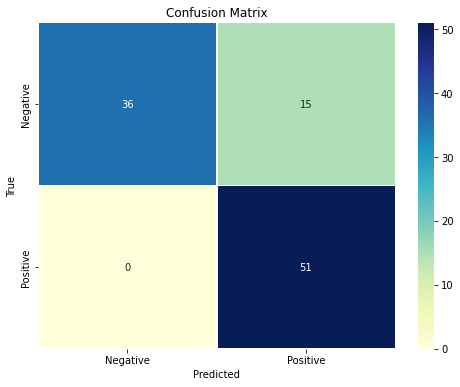

Adadelta


7/7 [==============================] - 0s 62ms/step - loss: 0.5184 - accuracy: 0.8137
Test Accuracy: 81.37%
7/7 [==============================] - 1s 67ms/step
              precision    recall  f1-score   support

           0       0.94      0.67      0.78        51
           1       0.74      0.96      0.84        51

    accuracy                           0.81       102
   macro avg       0.84      0.81      0.81       102
weighted avg       0.84      0.81      0.81       102

7/7 [==============================] - 0s 63ms/step


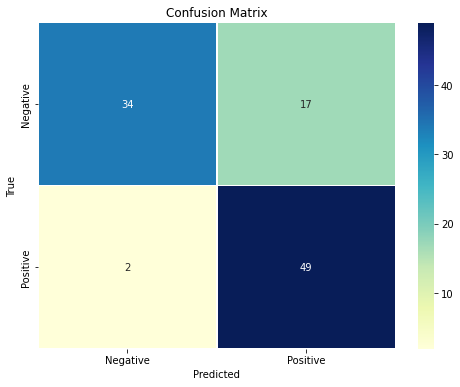

Nadam


7/7 [==============================] - 0s 64ms/step - loss: 0.3725 - accuracy: 0.8824
Test Accuracy: 88.24%
7/7 [==============================] - 1s 61ms/step
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        51
           1       1.00      0.76      0.87        51

    accuracy                           0.88       102
   macro avg       0.90      0.88      0.88       102
weighted avg       0.90      0.88      0.88       102

7/7 [==============================] - 0s 65ms/step


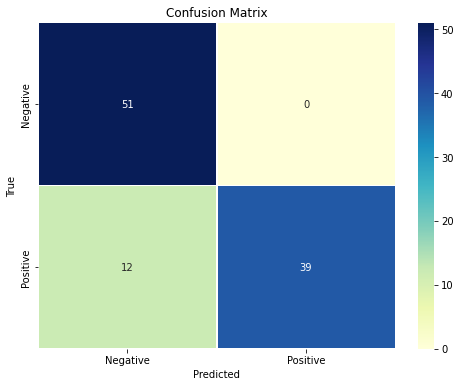

FTRL (Follow The Regularized Leader)


7/7 [==============================] - 0s 65ms/step - loss: 0.6933 - accuracy: 0.5000
Test Accuracy: 50.0%
7/7 [==============================] - 1s 63ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.50      1.00      0.67        51

    accuracy                           0.50       102
   macro avg       0.25      0.50      0.33       102
weighted avg       0.25      0.50      0.33       102

7/7 [==============================] - 1s 67ms/step


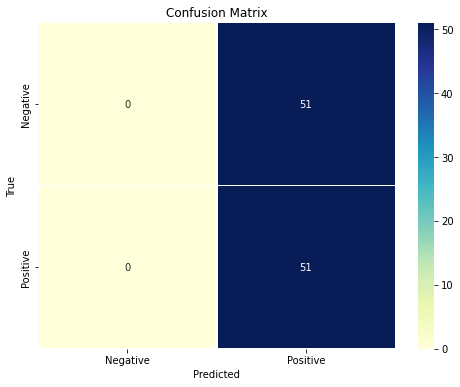

Total Accuracy: 83.75%


In [1]:
import tensorflow as tf
import os
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

full_path = r'{}'.format(os.getcwd())
TRAIN_PATH = full_path + r"\Train"
VAL_PATH = full_path + r"\Validation"
TEST_PATH = full_path + r"\Test"

batch_size = 16
epochs = 25
IMG_HEIGHT = 300
IMG_WIDTH = 300

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load Data
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

optimizers = {
    'sgd': {
        "Name": "Stochastic Gradient Descent",
        "Function": lambda model: model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])
    },
    'adam': {
        "Name": "Adam",
        "Function": lambda model: model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'rmsprop': {
        "Name": "RMSprop (Root Mean Square Propagation)",
        "Function": lambda model: model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'adagrad': {
        "Name": "Adagrad (Adaptive Gradient Algorithm)",
        "Function": lambda model: model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'adadelta': {
        "Name": "Adadelta",
        "Function": lambda model: model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'nadam': {
        "Name": "Nadam",
        "Function": lambda model: model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'ftrl': {
        "Name": "FTRL (Follow The Regularized Leader)",
        "Function": lambda model: model.compile(optimizer='ftrl', loss='binary_crossentropy', metrics=['accuracy'])
    }
}

total_accuracy = 0

for opt in optimizers:
    
    print(optimizers[opt]['Name'])

    model = Sequential([Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)), 
                        MaxPooling2D(), 
                        Dropout(0.2), 
                        Conv2D(32, 3, padding='same', activation='relu'), 
                        MaxPooling2D(), 
                        Conv2D(64, 3, padding='same', activation='relu'), 
                        MaxPooling2D(), 
                        Dropout(0.2),
                        Flatten(), 
                        Dense(128, activation='relu'), 
                        Dense(1, activation = 'sigmoid')])
    model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        verbose=0
    )

    print()
    print()
    test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
    print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")
    total_accuracy += round(test_accuracy * 100, 2)

    val_predictions = model.predict(test_generator)

    # Apply a threshold to convert predictions to class labels (0 or 1)
    val_labels = (val_predictions > 0.5).astype(int)

    # Get the true labels from the validation data generator
    val_true_labels = test_generator.classes

    # Generate the classification report
    class_names = ['0', '1']
    report = classification_report(val_true_labels, val_labels, target_names=class_names)

    # Print the classification report
    print(report)

    validation_predictions = model.predict(test_generator)
    predicted_classes = (validation_predictions > 0.5).astype(int)
    true_classes = test_generator.classes

    # Calculate the confusion matrix
    confusion = confusion_matrix(true_classes, predicted_classes)

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
total_accuracy /= 7
print(f"Total Accuracy: {round(total_accuracy,2)}%")

In [14]:
from tensorflow import keras

model = Sequential([Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)), 
        MaxPooling2D(), 
        Dropout(0.2), 
        Conv2D(32, 3, padding='same', activation='relu'), 
        MaxPooling2D(), 
        Conv2D(64, 3, padding='same', activation='relu'), 
        BatchNormalization(),
        MaxPooling2D(), 
        Dropout(0.2),
        Flatten(), 
        Dense(128, activation='relu'), 
        Dense(1, activation = 'sigmoid')])


model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
)

print()
print()
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")
total_accuracy += round(test_accuracy * 100, 2)

val_predictions = model.predict(test_generator)

# Apply a threshold to convert predictions to class labels (0 or 1)
val_labels = (val_predictions > validation_predictions.mean()).astype(int)

# Get the true labels from the validation data generator
val_true_labels = test_generator.classes

# Generate the classification report
class_names = ['0', '1']
report = classification_report(val_true_labels, val_labels, target_names=class_names)

# Print the classification report
print(report)

validation_predictions = model.predict(test_generator)
predicted_classes = (validation_predictions > validation_predictions.mean()).astype(int)
true_classes = test_generator.classes

# Calculate the confusion matrix
confusion = confusion_matrix(true_classes, predicted_classes)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/25
26/26 [==============================] - 14s 489ms/step - loss: 0.7149 - accuracy: 0.5846 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 2/25
 6/26 [=====>........................] - ETA: 9s - loss: 0.6928 - accuracy: 0.5625

KeyboardInterrupt: 